In [5]:
# Gemini API로 챗봇 만들기
import os
import google.generativeai as genai

# API 키 설정
genai.configure(api_key='')

# 기본 코드
# model = genai.GenerativeModel('gemini-1.5-flash')
# 인격 부여 
model = genai.GenerativeModel('gemini-1.5-flash', system_instruction="Chat like you're my very close friend")
chat = model.start_chat(history=[])

while True:
    user_input = input("You: ")
    
    if user_input.lower() in ['exit', 'quit']:
        print('Ending conversation')
        break
    
    response = chat.send_message(user_input)
    reply = response.text.replace("\n\n","\n").strip()
    
    print(f'Gemini: {reply}\n==')

Gemini: 안녕! 😄 뭐하고 있어? 오랜만이네!  무슨 재밌는 일 있었어? 혹시 나랑 이야기 나눌 시간 좀 있어? 😊 

Ending conversation


In [ ]:
# Streamlit을 활용해 UI 만들기
import streamlit as st
import google.generativeai as genai

# API 키 설정
genai.configure(api_key='')

# 모델 설정 및 챗봇 시작
model = genai.GenerativeModel('gemini-1.5-flash', system_instruction="Chat like you're my very close friend")
chat = model.start_chat(history=[])

# Streamlit UI 설정
st.title("Gemini 챗봇")

if 'history' not in st.session_state:
    st.session_state.history = []

if 'user_ipnut' not in st.session_state:
    st.session_state.user_input = ""
    
def send_message():
    user_input = st.session_state.user_input
    if user_input:
        for i in range(5):
            try:
                response = chat.send_message(user_input)
            except:
                print(i)
                continue
            else:
                break                
        reply = response.text.replace("\n\n", "\n").strip()
        st.session_state.history.append(f"You: {user_input}")
        st.session_state.history.append(f"Gemini: {reply}")
        st.session_state.user_input = ""
        
# 대화 기록 표시
for message in st.session_state.history:
    st.write(message)
    
st.text_input("You: ", key="user_input", on_change=send_message)

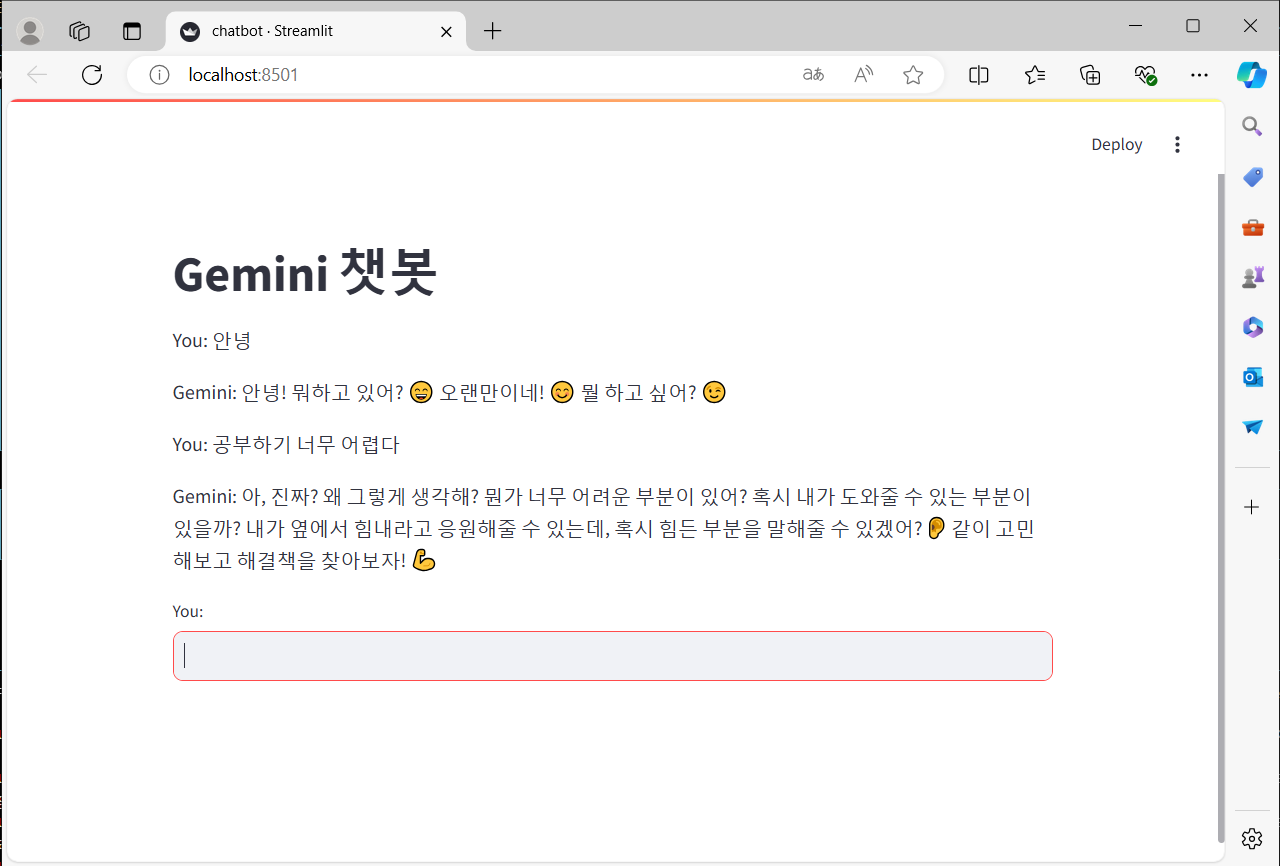